# Model


In [11]:
import tensorflow as tf


In [2]:
from keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model
import h5py
import PIL


In [3]:
model_path = "./model/model.h5"


In [4]:
# with h5py.File(model_path) as f:
#     # List all groups
#     print("Keys: %s" % f.keys())
#     a_group_key = list(f.keys())[0]

#     # Get the model weights and architecture
#     model_weights = f['model_weights']
#     model_config = f['model_config'].value


In [5]:
# Conversion of target image into parameter
img = img_to_array(load_img("./dataset/test/3/32187_6322.jpg", target_size=(256, 256)))


img_scaled = img.astype("float32")
img /= 255


In [6]:
import numpy as np


In [7]:
import matplotlib.pyplot as plt


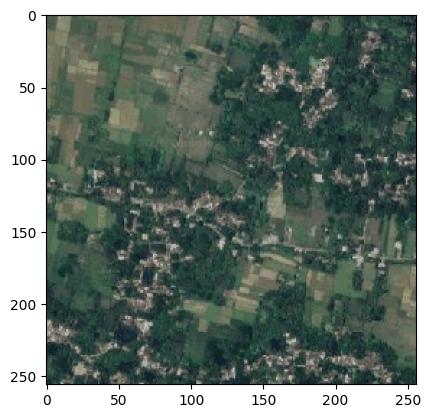

In [8]:
plt.imshow(img)
plt.show()


In [9]:
model = load_model(model_path)


d:\QWERTY\PROGRAMMING\PROJECT\ROHIT\VENV\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
img = np.reshape(img, newshape=(1,))


ValueError: cannot reshape array of size 196608 into shape (1,)

In [ ]:
model.predict(img)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 256, 3), dtype=float32). Expected shape (None, 32768), but input has incompatible shape (32, 256, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 256, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
model.history.history


{}

# Dataset Exploration


In [18]:
import pandas as pd
CSV_FILE: str = "static/assets/dataset/DHS_data.csv"
JSON_FILE: str = "static/assets/dataset/data.json"


In [19]:
data = pd.read_json(JSON_FILE).transpose()


data


,Access to water (in Hrs),Access to electricity,Access to cellphone,Education completed,Wealth Index Factor Score,Latitude,Longitude,Location Name
1,1.0,3,3,13.114754,-0.60046,21.965697,90.126312,"Barguna District, -, Bangladesh"
2,0.25,3,2,11.47541,0.27489,22.221232,90.348908,"Polder 43/2B, Patuakhali District, Patuakhali ..."
3,0.08,1,1,0.0,0.63216,22.191484,90.212539,"Barguna District, Ayla Patakata -, Bangladesh"
4,0.17,1,1,0.0,-0.22385,22.185481,90.167023,"Barguna District, Keorabunia -, Bangladesh"
13,0.08,0,1,0.0,-0.84562,22.952512,90.450585,"Hizla Subdistrict, Barisal District -, Bangladesh"
...,...,...,...,...,...,...,...,...
379,9.0,18,16,45.901639,-1.180865,24.833158,88.570164,"Z6852, Naogaon District, Niamatpur -, Bangladesh"
380,5.83,12,15,63.934426,-0.89633,25.149563,88.650142,"Naogaon District, -, Bangladesh"
381,0.42,5,5,18.032787,-0.74025,24.70551,88.913431,"Naogaon District, -, Bangladesh"
382,2.67,10,11,23.770492,-1.03357,24.292164,88.953593,"Natore District, - 6431, Bangladesh"


In [20]:
data.columns


Index(['Access to water (in Hrs)', 'Access to electricity',
       'Access to cellphone', 'Education completed',
       'Wealth Index Factor Score', 'Latitude', 'Longitude', 'Location Name'],
      dtype='object')

In [25]:
def clean_data(data):
    # Round columns 'Cluster', 'Access to water' and 3 other columns (Number of decimals: 0)
    data = data.round(
        {
            "Cluster": 0,
            "Access to water": 0,
            "Access to electricity": 0,
            "Acess to cellphone": 0,
            "Education completed": 0,
            "Wealth Index Factor Score": 2,
        }
    ).rename(columns={"Access to water": "Access to water (in Hrs)"})
    return data


data_clean = clean_data(data.copy())
data_clean.head()


,Access to water (in Hrs),Access to electricity,Access to cellphone,Education completed,Wealth Index Factor Score,Latitude,Longitude,Location Name
1,1.0,3,3,13.114754,-0.60046,21.965697,90.126312,"Barguna District, -, Bangladesh"
2,0.25,3,2,11.47541,0.27489,22.221232,90.348908,"Polder 43/2B, Patuakhali District, Patuakhali ..."
3,0.08,1,1,0.0,0.63216,22.191484,90.212539,"Barguna District, Ayla Patakata -, Bangladesh"
4,0.17,1,1,0.0,-0.22385,22.185481,90.167023,"Barguna District, Keorabunia -, Bangladesh"
13,0.08,0,1,0.0,-0.84562,22.952512,90.450585,"Hizla Subdistrict, Barisal District -, Bangladesh"


In [27]:
data.to_csv(CSV_FILE, index=False)
data.transpose().to_json(JSON_FILE)
data


,Access to water (in Hrs),Access to electricity,Access to cellphone,Education completed,Wealth Index Factor Score,Latitude,Longitude,Location Name
1,1.0,3,3,13.114754,-0.60046,21.965697,90.126312,"Barguna District, -, Bangladesh"
2,0.25,3,2,11.47541,0.27489,22.221232,90.348908,"Polder 43/2B, Patuakhali District, Patuakhali ..."
3,0.08,1,1,0.0,0.63216,22.191484,90.212539,"Barguna District, Ayla Patakata -, Bangladesh"
4,0.17,1,1,0.0,-0.22385,22.185481,90.167023,"Barguna District, Keorabunia -, Bangladesh"
13,0.08,0,1,0.0,-0.84562,22.952512,90.450585,"Hizla Subdistrict, Barisal District -, Bangladesh"
...,...,...,...,...,...,...,...,...
379,9.0,18,16,45.901639,-1.180865,24.833158,88.570164,"Z6852, Naogaon District, Niamatpur -, Bangladesh"
380,5.83,12,15,63.934426,-0.89633,25.149563,88.650142,"Naogaon District, -, Bangladesh"
381,0.42,5,5,18.032787,-0.74025,24.70551,88.913431,"Naogaon District, -, Bangladesh"
382,2.67,10,11,23.770492,-1.03357,24.292164,88.953593,"Natore District, - 6431, Bangladesh"


# Adding Location Names


In [ ]:
# %pip install geopy
%pip install opencage


In [7]:
OPEN_CAGE_API_KEY = "45a84f8883fb4b0abcb5bae9c602e637"


In [3]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from opencage.geocoder import OpenCageGeocode


In [96]:
jsonData: pd.DataFrame = (
    pd.read_json("./static/assets/dataset/data.json")
    .transpose()
    .reset_index(names="Cluster")
    .set_index("Cluster")
)
jsonData


,Access to water,Access to electricity,Access to cellphone,Education completed,Wealth Index Factor Score,Latitude,Longitude,Location Name
Cluster,,,,,,,,
1,60,3,3,16,-0.60046,21.965697,90.126312,"Barguna District, -, Bangladesh"
2,15,3,2,14,0.27489,22.221232,90.348908,"Polder 43/2B, Patuakhali District, Patuakhali ..."
3,5,1,1,0,0.63216,22.191484,90.212539,"Barguna District, Ayla Patakata -, Bangladesh"
4,10,1,1,0,-0.22385,22.185481,90.167023,"Barguna District, Keorabunia -, Bangladesh"
13,5,0,1,0,-0.84562,22.952512,90.450585,"Hizla Subdistrict, Barisal District -, Bangladesh"
...,...,...,...,...,...,...,...,...
379,540,18,16,56,-1.180865,24.833158,88.570164,"Z6852, Naogaon District, Niamatpur -, Bangladesh"
380,350,12,15,78,-0.89633,25.149563,88.650142,"Naogaon District, -, Bangladesh"
381,25,5,5,22,-0.74025,24.70551,88.913431,"Naogaon District, -, Bangladesh"


In [97]:
jsonData = jsonData.astype({"Education completed": "int8"})
total_sum = jsonData["Education completed"].max()

# Calculate the percentage of each value relative to the total distribution
jsonData["Education completed"] = (jsonData["Education completed"] / total_sum) * 100
jsonData


,Access to water,Access to electricity,Access to cellphone,Education completed,Wealth Index Factor Score,Latitude,Longitude,Location Name
Cluster,,,,,,,,
1,60,3,3,13.114754,-0.60046,21.965697,90.126312,"Barguna District, -, Bangladesh"
2,15,3,2,11.475410,0.27489,22.221232,90.348908,"Polder 43/2B, Patuakhali District, Patuakhali ..."
3,5,1,1,0.000000,0.63216,22.191484,90.212539,"Barguna District, Ayla Patakata -, Bangladesh"
4,10,1,1,0.000000,-0.22385,22.185481,90.167023,"Barguna District, Keorabunia -, Bangladesh"
13,5,0,1,0.000000,-0.84562,22.952512,90.450585,"Hizla Subdistrict, Barisal District -, Bangladesh"
...,...,...,...,...,...,...,...,...
379,540,18,16,45.901639,-1.180865,24.833158,88.570164,"Z6852, Naogaon District, Niamatpur -, Bangladesh"
380,350,12,15,63.934426,-0.89633,25.149563,88.650142,"Naogaon District, -, Bangladesh"
381,25,5,5,18.032787,-0.74025,24.70551,88.913431,"Naogaon District, -, Bangladesh"


In [100]:
jsonData.transpose().to_json("./static/assets/dataset/data.json")


## GeoPy


In [8]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# Rate limiter to prevent exceeding the usage limits of the API
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)


In [9]:
# Function to reverse geocode
def reverse_geocode(lat, lon):
    location = geocode((lat, lon), language="en")
    return location.address if location else None


In [ ]:
# Apply the reverse geocode function to the DataFrame
# data['location_name'] = data.apply(lambda row: reverse_geocode(row['Latitude'], row['Longitude']), axis=1)

# print(data)
# ! ERROR: Request TimedOut


## OpenCage


In [8]:
# Initialize OpenCage Geocoder with your API key
geocoder = OpenCageGeocode(OPEN_CAGE_API_KEY)


In [1]:
# Function to reverse geocode
def reverse_geocode(lat, lon):
    try:
        result = geocoder.reverse_geocode(lat, lon, language="en")
        print(result)
        return result[0]["formatted"] if result else None
    except Exception as e:
        print(f"Error: {e}")
        return None


In [18]:
def get_population(latitude, longitude):
    # Initialize Nominatim geocoder
    geolocator = Nominatim(user_agent="get_population")

    # Perform reverse geocoding to get location information
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    if location and "address" in location:
        print("location", location)
        rawLoc = location.raw
        # Extract population data from the location information
        population = rawLoc["address"].get("population")

        if population:
            return int(population)
    else:
        return None


# Example latitude and longitude
latitude = 21.965697
longitude = 90.126312

# Get the population for the given coordinates
population = get_population(latitude, longitude)

if population is not None:
    print("Population:", population)
else:
    print("Population data not found.")


Population data not found.


In [30]:
# Sample DataFrame with latitude and longitude
data = {
    "Latitude": [40.748817, 48.858844, 34.052235, 28.545718, 28.5458247],
    "Longitude": [-73.985428, 2.294351, -118.243683, 77.1165502, 77.186449],
}
# df = pd.DataFrame(data)
df = jsonData
df


,Access to water,Access to electricity,Acess to cellphone,Education completed,Wealth Index Factor Score,Latitude,Longitude
Cluster,,,,,,,
1,60,3,3,16,-0.600460,21.965697,90.126312
2,15,3,2,14,0.274890,22.221232,90.348908
3,5,1,1,0,0.632160,22.191484,90.212539
4,10,1,1,0,-0.223850,22.185481,90.167023
13,5,0,1,0,-0.845620,22.952512,90.450585
...,...,...,...,...,...,...,...
379,540,18,16,56,-1.180865,24.833158,88.570164
380,350,12,15,78,-0.896330,25.149563,88.650142
381,25,5,5,22,-0.740250,24.705510,88.913431


In [32]:
# Apply the reverse geocode function to the DataFrame
df["location_name"] = df.apply(
    lambda row: reverse_geocode(row["Latitude"], row["Longitude"]), axis=1
)


df


,Access to water,Access to electricity,Acess to cellphone,Education completed,Wealth Index Factor Score,Latitude,Longitude,location_name
Cluster,,,,,,,,
1,60,3,3,16,-0.600460,21.965697,90.126312,"unnamed road, Barguna District, -, Bangladesh"
2,15,3,2,14,0.274890,22.221232,90.348908,"Polder 43/2B, Patuakhali District, Patuakhali ..."
3,5,1,1,0,0.632160,22.191484,90.212539,"unnamed road, Barguna District, Ayla Patakata ..."
4,10,1,1,0,-0.223850,22.185481,90.167023,"unnamed road, Barguna District, Keorabunia -, ..."
13,5,0,1,0,-0.845620,22.952512,90.450585,"unnamed road, Hizla Subdistrict, Barisal Distr..."
...,...,...,...,...,...,...,...,...
379,540,18,16,56,-1.180865,24.833158,88.570164,"Z6852, Naogaon District, Niamatpur -, Bangladesh"
380,350,12,15,78,-0.896330,25.149563,88.650142,"unnamed road, Naogaon District, -, Bangladesh"
381,25,5,5,22,-0.740250,24.705510,88.913431,"unnamed road, Naogaon District, -, Bangladesh"


In [34]:
df.rename(columns={"location_name": "Location Name"}, inplace=True)


In [36]:
df["Location Name"] = df["Location Name"].str.replace("unnamed road, ", "", case=False)
df


,Access to water,Access to electricity,Acess to cellphone,Education completed,Wealth Index Factor Score,Latitude,Longitude,Location Name
Cluster,,,,,,,,
1,60,3,3,16,-0.600460,21.965697,90.126312,"Barguna District, -, Bangladesh"
2,15,3,2,14,0.274890,22.221232,90.348908,"Polder 43/2B, Patuakhali District, Patuakhali ..."
3,5,1,1,0,0.632160,22.191484,90.212539,"Barguna District, Ayla Patakata -, Bangladesh"
4,10,1,1,0,-0.223850,22.185481,90.167023,"Barguna District, Keorabunia -, Bangladesh"
13,5,0,1,0,-0.845620,22.952512,90.450585,"Hizla Subdistrict, Barisal District -, Bangladesh"
...,...,...,...,...,...,...,...,...
379,540,18,16,56,-1.180865,24.833158,88.570164,"Z6852, Naogaon District, Niamatpur -, Bangladesh"
380,350,12,15,78,-0.896330,25.149563,88.650142,"Naogaon District, -, Bangladesh"
381,25,5,5,22,-0.740250,24.705510,88.913431,"Naogaon District, -, Bangladesh"


In [98]:
df.transpose().to_json("./static/assets/dataset/data.json")


NameError: name 'df' is not defined

# Graphs


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt


In [19]:
data = (
    pd.read_json("static/assets/dataset/data.json")
    .transpose()
    .reset_index(names="Cluster")
    .set_index("Cluster")
)
data["Access to water"] = data["Access to water (in Hrs)"].convert_dtypes(convert_integer=True)
data.reset_index(inplace=True)
data.head()


,Cluster,Access to water (in Hrs),Access to electricity,Access to cellphone,Education completed,Wealth Index Factor Score,Latitude,Longitude,Location Name,Access to water
0,1,1.0,3,3,13.114754,-0.60046,21.965697,90.126312,"Barguna District, -, Bangladesh",1.0
1,2,0.25,3,2,11.47541,0.27489,22.221232,90.348908,"Polder 43/2B, Patuakhali District, Patuakhali ...",0.25
2,3,0.08,1,1,0.0,0.63216,22.191484,90.212539,"Barguna District, Ayla Patakata -, Bangladesh",0.08
3,4,0.17,1,1,0.0,-0.22385,22.185481,90.167023,"Barguna District, Keorabunia -, Bangladesh",0.17
4,13,0.08,0,1,0.0,-0.84562,22.952512,90.450585,"Hizla Subdistrict, Barisal District -, Bangladesh",0.08


In [5]:
import folium
from folium.plugins import MarkerCluster

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a map centered around the average coordinates
m = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=10)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row["Latitude"], row["Longitude"]),
        radius=row["Access to water"] / 10,  # Scale radius for better visualization
        color="blue" if row["Wealth Index Factor Score"] > 0 else "red",
        fill=True,
        fill_color="blue" if row["Wealth Index Factor Score"] > 0 else "red",
        fill_opacity=0.6,
        popup=(
            f"Location: {row['Location Name']}<br>"
            f"Access to water: {row['Access to water']}<br>"
            f"Access to electricity: {row['Access to electricity']}<br>"
            f"Access to cellphone: {row['Access to cellphone']}<br>"
            f"Education completed: {row['Education completed']}<br>"
            f"Wealth Index Factor Score: {row['Wealth Index Factor Score']}"
        ),
    ).add_to(marker_cluster)

# Display the map
m.save("map.html")


In [ ]:
fig = px.scatter_geo(
    data,
    lat="Latitude",
    lon="Longitude",
    # text="Location Name",
    size="Access to water",  # Size of the marker
    color="Wealth Index Factor Score",  # Color of the marker
    hover_name="Location Name",  # Information to display on hover
    projection="natural earth",
    basemap_visible=True,
).update_layout(
    title="Choropleth Map of Access and Wealth Index in Bangladesh",
    geo=dict(
        scope="asia",
        showcountries=True,
        countrycolor="RebeccaPurple",
    ),
)
fig.to_html()


In [28]:
fig


In [32]:
def plotGraph(y="Wealth Index Factor Score"):
    x = "Cluster"
    return px.bar(
        data,
        x,
        y,
        color="Wealth Index Factor Score",
        labels={"x": x, "y": y},
    ).update_layout(
        height=600,
        title_text=f"{x} X {y}",
        xaxis_title="Cluster Count",
        showlegend=True,
    )


In [33]:
plotGraph()


In [11]:
print(*data.columns, sep="\n")


Access to water
Access to electricity
Access to cellphone
Education completed
Wealth Index Factor Score
Latitude
Longitude
Location Name


In [9]:
plotGraph("Access to electricity")


In [10]:
plotGraph("Access to cellphone")


In [11]:
plotGraph("Education completed")


In [12]:
plotGraph("Wealth Index Factor Score", )
